In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
X = df.values
y = boston.target
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [6]:
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [7]:
from sklearn.linear_model import LinearRegression
lr_ne = LinearRegression(fit_intercept = True, n_jobs = 8)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [9]:
lr_ne.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=False)

In [10]:
lr_ne.intercept_, lr_ne.coef_    # 상수항(절편), 가중치(계수)

(33.38806218932447,
 array([-1.28060398e-01,  3.77955693e-02,  5.86107797e-02,  3.24007007e+00,
        -1.62222676e+01,  3.89352244e+00, -1.27879944e-02, -1.42326864e+00,
         2.34513082e-01, -8.20261127e-03, -9.29950535e-01,  1.19151410e-02,
        -5.48489997e-01]))

In [11]:
y_hat = lr_ne.predict(X_test)
y_true = y_test

In [12]:
rmse = np.sqrt((((y_hat - y_true) ** 2).sum() / len(y_true)))
rmse

4.5549032218378604

In [13]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_hat, y_true)
mse

20.747143360308918

Text(0.5,1,'Prices vs Predicted prices : $Y_i$ vs $\\hat{Y}_is$')

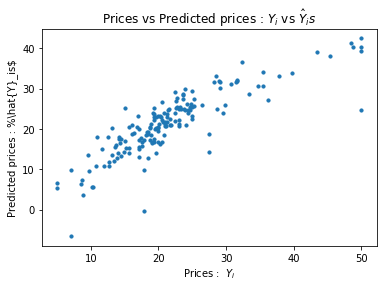

In [14]:
plt.scatter(y_true, y_hat, s = 10)
plt.xlabel('Prices :  $Y_i$')
plt.ylabel('Predicted prices : %\hat{Y}_is$')
plt.title('Prices vs Predicted prices : $Y_i$ vs $\hat{Y}_is$')

### Linear Regression with SGD

In [15]:
from sklearn.linear_model import SGDRegressor
lr_SGD = SGDRegressor(loss = 'squared_loss', penalty = 'l2', alpha = 0.01, max_iter = 100000, shuffle = True)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [17]:
lr_SGD.fit(X_train, y_train)

SGDRegressor(alpha=0.01, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=100000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [18]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [19]:
mse = mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true) ** 2).sum() / len(y_true)))
rmse, mse     # 학습을 하지 못하고 발산(scaled data를 사용해서 다시 fitting해야 함)

(45814437853619.875, 2.0989627158431976e+27)

Text(0.5,1,'Prices vs Predicted prices : $Y_i$ vs $\\hat{Y}_i$')

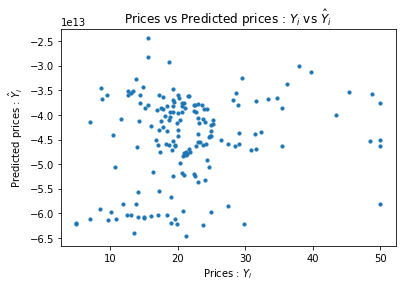

In [20]:
plt.scatter(y_true, y_hat, s = 10)
plt.xlabel('Prices : $Y_i$')
plt.ylabel('Predicted prices : $\hat{Y}_i$')
plt.title('Prices vs Predicted prices : $Y_i$ vs $\hat{Y}_i$')

In [21]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_scaled = std_scaler.transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 42)

In [23]:
lr_SGD.fit(X_train, y_train)

SGDRegressor(alpha=0.01, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=100000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [24]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [25]:
mse = mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true) ** 2).sum() / len(y_true)))
rmse, mse

(4.564731557808295, 20.836774194850943)

Text(0.5,1,'Prices vs Predicted prices : $Y_i$ vs $\\hat{Y}_i$')

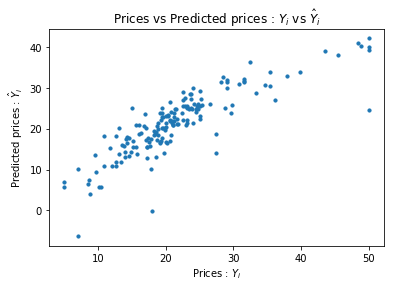

In [26]:
plt.scatter(y_true, y_hat, s = 10)
plt.xlabel('Prices : $Y_i$')
plt.ylabel('Predicted prices : $\hat{Y}_i$')
plt.title('Prices vs Predicted prices : $Y_i$ vs $\hat{Y}_i$')

### Ridge & Lasso regression with Scikit Learn

In [27]:
from sklearn.linear_model import Lasso, Ridge

In [28]:
ridge = Ridge(fit_intercept = True, normalize = True, copy_X = True, alpha  = 0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [29]:
y_hat = ridge.predict(X_test)
y_true = y_test
mse = mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true) ** 2).sum() / len(y_true)))
rmse, mse

(4.941976490564917, 24.423131633296336)

In [30]:
from sklearn.model_selection import KFold
print('Ridge Regression')
print('alpha\t RMSE_train \t RMSE_10cv\n')
alpha = np.linspace(0.01, 20, 50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha :
    ridge = Ridge(fit_intercept = True, alpha = a)
    
    ridge.fit(X_train, y_train)
    p = ridge.predict(X_test)
    err = p - y_test
    total_error = np.dot(err, err)
    rmse_train = np.sqrt(total_error/len(p))
    kf = KFold(10)
    xval_err = 0
    for train, test in kf.split(X) :
        ridge.fit(X[train], y[train])
        p = ridge.predict(X[test])
        err = p - y[test]
        xval_err += np.dot(err, err)
    rmse_10cv = np.sqrt(xval_err / len(X))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f} \t\t {:.4f}'.format(a, rmse_train, rmse_10cv))

Ridge Regression
alpha	 RMSE_train 	 RMSE_10cv

0.010	 4.5549 		 5.8806
0.418	 4.5561 		 5.8467
0.826	 4.5573 		 5.8319
1.234	 4.5586 		 5.8234
1.642	 4.5598 		 5.8175
2.050	 4.5610 		 5.8126
2.458	 4.5622 		 5.8082
2.866	 4.5634 		 5.8041
3.274	 4.5646 		 5.8000
3.682	 4.5658 		 5.7960
4.090	 4.5670 		 5.7920
4.498	 4.5682 		 5.7880
4.906	 4.5694 		 5.7840
5.313	 4.5706 		 5.7800
5.721	 4.5717 		 5.7760
6.129	 4.5729 		 5.7720
6.537	 4.5741 		 5.7680
6.945	 4.5752 		 5.7641
7.353	 4.5764 		 5.7602
7.761	 4.5775 		 5.7563
8.169	 4.5787 		 5.7524
8.577	 4.5798 		 5.7485
8.985	 4.5809 		 5.7447
9.393	 4.5820 		 5.7410
9.801	 4.5832 		 5.7372
10.209	 4.5843 		 5.7335
10.617	 4.5854 		 5.7298
11.025	 4.5865 		 5.7262
11.433	 4.5876 		 5.7226
11.841	 4.5887 		 5.7190
12.249	 4.5897 		 5.7155
12.657	 4.5908 		 5.7120
13.065	 4.5919 		 5.7086
13.473	 4.5930 		 5.7052
13.881	 4.5940 		 5.7018
14.289	 4.5951 		 5.6985
14.697	 4.5961 		 5.6952
15.104	 4.5972 		 5.6919
15.512	 4.5982 		 5.6887
15

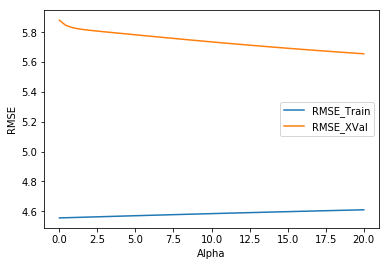

In [31]:
plt.plot(alpha, t_rmse, label = 'RMSE_Train')
plt.plot(alpha, cv_rmse, label = 'RMSE_XVal')
plt.legend(('RMSE_Train', 'RMSE_XVal'))
plt.ylabel('RMSE')
plt.xlabel('Alpha')
plt.show()

### Polynomial Regression

In [32]:
def f(size) : 
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1
    return(x, y)

def sample(size) :
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1 + np.random.randn(x.size) * 0.5
    return(x, y)

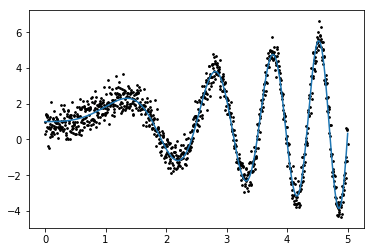

In [33]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X, y = sample(1000)
plt.scatter(X, y, s = 3, c = 'black')
plt.show()

In [34]:
X.shape, y.shape

((1000,), (1000,))

In [35]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
X.shape, y.shape

((1000, 1), (1000, 1))

In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

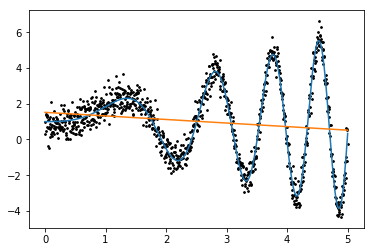

In [37]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s = 3, c = 'black')
plt.plot(X.flatten(), lr.predict(X).flatten())
plt.show()     # 회귀선 추정하여 그리기

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2)
X_poly = poly_features.fit_transform(X)
X_poly[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04],
       [1.00000000e+00, 2.00200200e-02, 4.00801202e-04],
       [1.00000000e+00, 2.50250250e-02, 6.26251878e-04],
       [1.00000000e+00, 3.00300300e-02, 9.01802704e-04],
       [1.00000000e+00, 3.50350350e-02, 1.22745368e-03],
       [1.00000000e+00, 4.00400400e-02, 1.60320481e-03],
       [1.00000000e+00, 4.50450450e-02, 2.02905608e-03]])

In [39]:
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

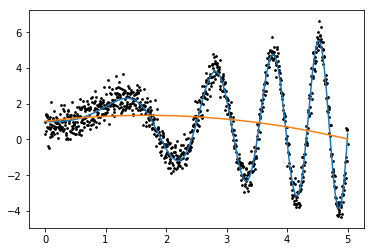

In [40]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s = 3, c = 'black')
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [41]:
poly_features = PolynomialFeatures(degree = 16)
X_poly = poly_features.fit_transform(X)
X_poly[:3]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05, 1.25375751e-07,
        6.27506263e-10, 3.14067198e-12, 1.57190790e-14, 7.86740691e-17,
        3.93764110e-19, 1.97079134e-21, 9.86382051e-24, 4.93684710e-26,
        2.47089445e-28, 1.23668391e-30, 6.18960915e-33, 3.09790248e-35,
        1.55050174e-37],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04, 1.00300601e-06,
        1.00401002e-08, 1.00501504e-10, 1.00602106e-12, 1.00702808e-14,
        1.00803612e-16, 1.00904517e-18, 1.01005522e-20, 1.01106629e-22,
        1.01207837e-24, 1.01309146e-26, 1.01410556e-28, 1.01512068e-30,
        1.01613682e-32]])

In [42]:
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

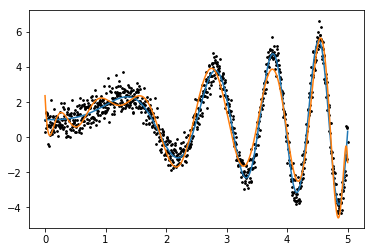

In [43]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s = 3, c = 'black')
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [44]:
def rmse(predictions, targets) :
    return np.sqrt(((predictions - targets) ** 2).mean())

In [65]:
poly_range = list(range(10, 50))
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

for poly_value in poly_range :
    poly_features = PolynomialFeatures(degree = poly_value)
    X_poly = poly_features.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_poly, y)
    
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))
    
    lasso = Lasso(alpha=0.5, fit_intercept = False)
    lasso.fit(X_poly, y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))
    
    ridge = Ridge(alpha=0.5, fit_intercept = False)
    ridge.fit(X_poly, y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))

/home/jin-lab/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/jin-lab/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.63029343670528e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/home/jin-lab/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.4333389256089504e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/home/jin-lab/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-co

/home/jin-lab/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.9473981598401456e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)
/home/jin-lab/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.2071053593254445e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)
/home/jin-lab/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.750198740919387e-20
  ' condition number: {}'.format(rcond), RuntimeWarning)


In [66]:
import pandas as pd
from pandas import DataFrame
data = {'poly_range' : poly_range, 'lr_rmse' : rmse_lr_list,
       'lasso_rmse' : rmse_lasso_list, 'ridge_rmse' : rmse_ridge_list}
df = DataFrame(data).set_index('poly_range')
df

,lasso_rmse,lr_rmse,ridge_rmse
poly_range,,,
10,2.287430,1.906413,1.921752
11,2.286194,1.897359,1.910782
12,2.284683,1.625725,1.909448
13,2.283578,1.339138,1.861958
14,2.283160,1.325382,1.585558
15,2.283362,0.913602,1.559023
16,2.284079,0.716463,1.478898
17,2.285069,0.685019,1.467680
18,2.286037,0.708109,1.446605


In [67]:
df.min()

lasso_rmse    2.283160
lr_rmse       0.536452
ridge_rmse    0.509379
dtype: float64

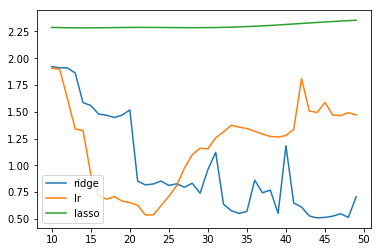

In [68]:
plt.plot(poly_range, df['ridge_rmse'], label = 'ridge')
plt.plot(poly_range, df['lr_rmse'], label = 'lr')
plt.plot(poly_range, df['lasso_rmse'], label = 'lasso')
plt.legend()
plt.show()

### Challenge

In [87]:
df = pd.read_csv('yield.csv', sep = '\t')
df.head()

,i,Temp,Yield
0,1,50,3.3
1,2,50,2.8
2,3,50,2.9
3,4,70,2.3
4,5,70,2.6


In [88]:
df.shape

(15, 3)

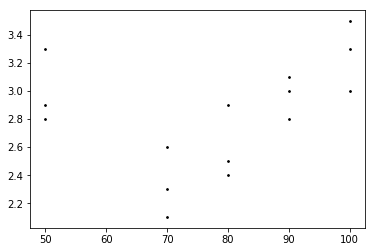

In [89]:
plt.scatter(df.Temp, df.Yield, s = 3, c = 'black')
plt.show()

In [90]:
y = df.Yield.reshape(-1, 1)

/home/jin-lab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [91]:
poly_range = list(range(2, 10))
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

for poly_value in poly_range :
    poly_features = PolynomialFeatures(degree = poly_value)
    X_poly = poly_features.fit_transform(df.Temp.reshape(-1, 1))
    lr = LinearRegression()
    lr.fit(X_poly, y)
    
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))
    
    lasso = Lasso(alpha=0.5, fit_intercept = False)
    lasso.fit(X_poly, y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))
    
    ridge = Ridge(alpha=0.5, fit_intercept = False)
    ridge.fit(X_poly, y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))

/home/jin-lab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # This is added back by InteractiveShellApp.init_path()
/home/jin-lab/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/jin-lab/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.562437900412282e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/home/jin-lab/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not gu

In [92]:
import pandas as pd
from pandas import DataFrame
data = {'poly_range' : poly_range, 'lr_rmse' : rmse_lr_list,
       'lasso_rmse' : rmse_lasso_list, 'ridge_rmse' : rmse_ridge_list}
df = DataFrame(data).set_index('poly_range')
df

,lasso_rmse,lr_rmse,ridge_rmse
poly_range,,,
2,0.462831,0.218597,0.430601
3,0.457513,0.196676,0.248293
4,0.454210,0.196638,0.198925
5,0.465950,0.196638,0.200107
6,0.468186,0.196638,0.196638
7,0.466982,0.196638,0.196638
8,0.464999,0.196638,0.196638
9,0.463118,0.196638,0.196638


In [93]:
df.min()

lasso_rmse    0.454210
lr_rmse       0.196638
ridge_rmse    0.196638
dtype: float64

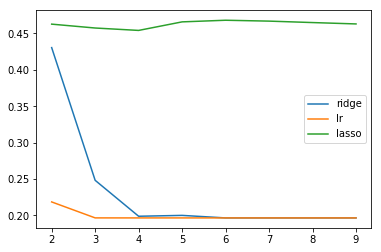

In [94]:
plt.plot(poly_range, df['ridge_rmse'], label = 'ridge')
plt.plot(poly_range, df['lr_rmse'], label = 'lr')
plt.plot(poly_range, df['lasso_rmse'], label = 'lasso')
plt.legend()
plt.show()

약 degree가 3, 4일 때에 rmse가 가장 낮고, lasso는 0.47 정도 수준이 꾸준히 유지됨